<a href="https://colab.research.google.com/github/szn5400/CO2_all/blob/main/STT_pressure_complete_debug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code is for debugging everything related to the Pressure for 3D heterogenous toy dataset.

In [ ]:
# This is code for Gas Saturation output for 500 epochs for a single output network 
# Data is shuffled
# Rescaling done with data from the full dataset

import sys
sys.path.append('/content/drive/MyDrive/code/MLP')

from read_data_unscaled import read
import os
import numpy as np
import glob
import collections
from read_model import MLP_single
from data_to_numpy_unscaled import numpy_single


#read data
all_pressures,all_saturations,all_permeabilities,all_porosities,all_surf_inj_rate_series,all_surf_prod_rate_series,Ks,Rs = read()

#convert to numpy
features1_tr,target1_tr,features1_te,target1_te,permeability_min,permeability_max,porosity_min,porosity_max,surf_inj_rate_min,surf_inj_rate_max,min_target,max_target = numpy_single(all_pressures,all_saturations,all_permeabilities,all_porosities,all_surf_inj_rate_series,all_surf_prod_rate_series,Ks,Rs,all_pressures)



All files: ['/content/drive/MyDrive/data_2/k1r1-5-h.out', '/content/drive/MyDrive/data_2/k1r1-h.out', '/content/drive/MyDrive/data_2/k1r2-5-h.out', '/content/drive/MyDrive/data_2/k1r2-h.out', '/content/drive/MyDrive/data_2/k1r3-5-h.out', '/content/drive/MyDrive/data_2/k1r3-h.out', '/content/drive/MyDrive/data_2/k1r4-h.out', '/content/drive/MyDrive/data_2/k1r5-h.out', '/content/drive/MyDrive/data_2/k1r6-h.out', '/content/drive/MyDrive/data_2/k2r1-h.out', '/content/drive/MyDrive/data_2/k2r2-h.out', '/content/drive/MyDrive/data_2/k2r3-h.out', '/content/drive/MyDrive/data_2/k2r4-h.out', '/content/drive/MyDrive/data_2/k2r5-h.out', '/content/drive/MyDrive/data_2/k2r6-h.out', '/content/drive/MyDrive/data_2/k2r7-h.out', '/content/drive/MyDrive/data_2/k2r8-h.out', '/content/drive/MyDrive/data_2/k2r9-h.out', '/content/drive/MyDrive/data_2/k3r1-h.out', '/content/drive/MyDrive/data_2/k3r2-h.out', '/content/drive/MyDrive/data_2/k3r3-h.out', '/content/drive/MyDrive/data_2/k3r4-h.out', '/content/driv

In [ ]:
# there are 27 datachunks as described previously. Each datachunk is as follows
one_unit_data_chunk = 1*71*25*25*3


In [ ]:
import matplotlib.pyplot as plt

def display_normalized_data(start_index, end_index, time_scale,plot_target):
  index = start_index+(time_scale*25*25*3)
  plot_x_target = [[0 for i in range(25)] for j in range(25)]
  plot_y_target = [[0 for i in range(25)] for j in range(25)]
  plot_z_target = [[0 for i in range(25)] for j in range(25)]

  for i in range(25):
      for j in range(25):
          plot_x_target[i][j] = plot_target[index]
          index+=1

          plot_y_target[i][j] = plot_target[index]
          index+=1

          plot_z_target[i][j] = plot_target[index]
          index+=1

  plt.imshow(np.squeeze(plot_x_target), cmap="jet")
  plt.title("z=1")
  plt.colorbar()
  plt.show()

  plt.imshow(np.squeeze(plot_y_target), cmap="jet")
  plt.title("z=2")
  plt.colorbar()
  plt.show()

  plt.imshow(np.squeeze(plot_z_target), cmap="jet")
  plt.title("z=3")
  plt.colorbar()
  plt.show()

In [ ]:
def display_normalized_data_subplots(start_index, end_index, time_scale,plot_target,min_target_raw,max_target_raw):
  index = start_index+(time_scale*25*25*3)
  plot_x_target = [[0 for i in range(25)] for j in range(25)]
  plot_y_target = [[0 for i in range(25)] for j in range(25)]
  plot_z_target = [[0 for i in range(25)] for j in range(25)]

  for i in range(25):
      for j in range(25):
          plot_x_target[i][j] = plot_target[index]
          index+=1

          plot_y_target[i][j] = plot_target[index]
          index+=1

          plot_z_target[i][j] = plot_target[index]
          index+=1
  #colors = [0.5,1]
  fig = plt.subplots(nrows=1, ncols=3)
  plt.subplot(1,3,1)
  plt.imshow(np.squeeze(plot_x_target),cmap="jet")
  plt.clim(min_target_raw,max_target_raw)
  

  plt.subplot(1,3,2)
  plt.imshow(np.squeeze(plot_y_target),cmap="jet")
  plt.clim(min_target_raw,max_target_raw)

  plt.subplot(1,3,3)
  plt.imshow(np.squeeze(plot_z_target),cmap="jet")
  plt.clim(min_target_raw,max_target_raw)
  plt.colorbar(shrink=1)


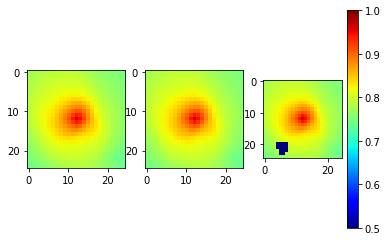

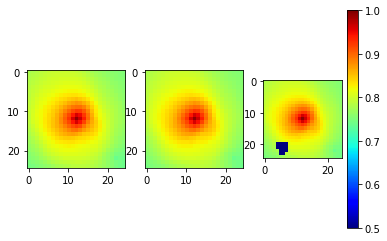

In [ ]:
for i in range(10,12):
  start_index = i*one_unit_data_chunk
  end_index = (i+1)*one_unit_data_chunk
  display_normalized_data_subplots(start_index, end_index,30,target1_tr)

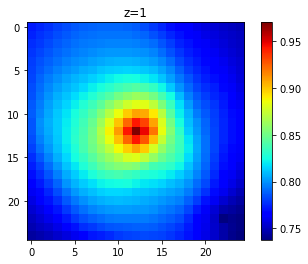

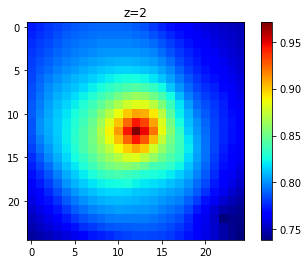

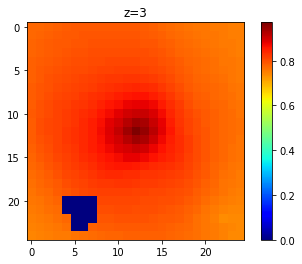

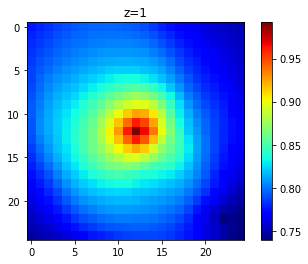

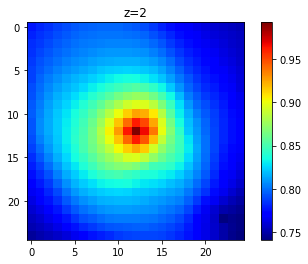

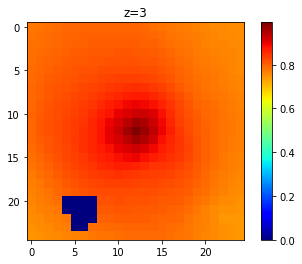

In [ ]:
for i in range(10,12):
  start_index = i*one_unit_data_chunk
  end_index = (i+1)*one_unit_data_chunk
  display_normalized_data(start_index, end_index,30,target1_tr)

In [ ]:
from data_to_numpy_raw import numpy_single_raw

features1_tr_raw,target1_tr_raw,features1_te_raw,target1_te_raw,permeability_min_raw,permeability_max_raw,porosity_min_raw,porosity_max_raw,surf_inj_rate_min_raw,surf_inj_rate_max_raw,min_target_raw,max_target_raw = numpy_single_raw(all_pressures,all_saturations,all_permeabilities,all_porosities,all_surf_inj_rate_series,all_surf_prod_rate_series,Ks,Rs,all_pressures)

27 71 25 25 3
(3594375, 7)
(3594375, 1)
all min at one place: [0. 0. 0. 0. 0. 0. 0.]
all max at one place: [1.00e+00 1.00e+00 1.00e+00 1.00e+00 8.14e+01 3.55e-01 9.00e+03]
Debug all vals:
all training min: [0. 0. 0. 0. 0. 0. 0.]
all training max: [1.00e+00 1.00e+00 1.00e+00 1.00e+00 8.14e+01 3.55e-01 9.00e+03]
all testing min: [0. 0. 0. 0. 0. 0. 0.]
all testing max: [1.00e+00 1.00e+00 1.00e+00 1.00e+00 8.14e+01 3.54e-01 3.00e+03]
min and max at training target: [0.] [4945.7]
min and max at testing target: [0.] [4583.6]
(3195000, 7)
(3195000, 1)
(399375, 7)
(399375, 1)


data point at i 5
data point at i 6
data point at i 7
data point at i 8
data point at i 9
data point at i 10
data point at i 11


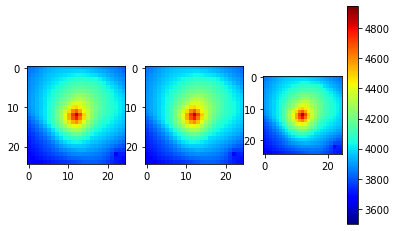

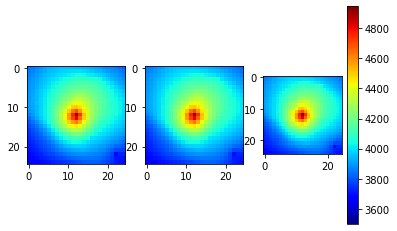

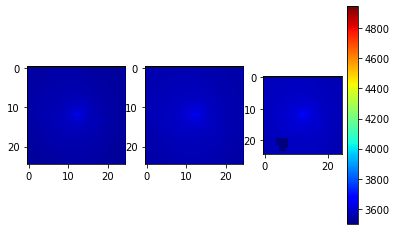

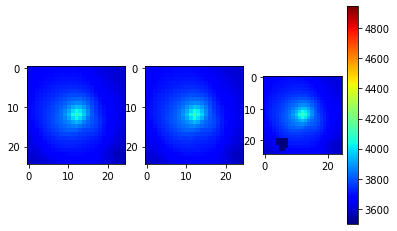

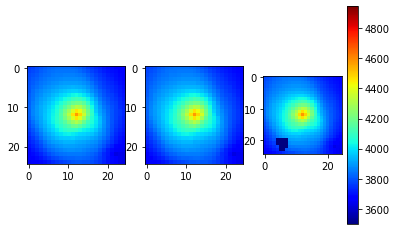

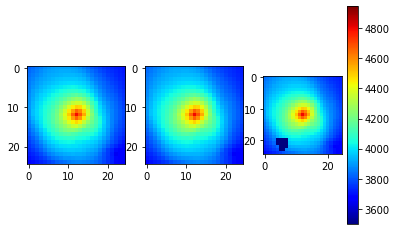

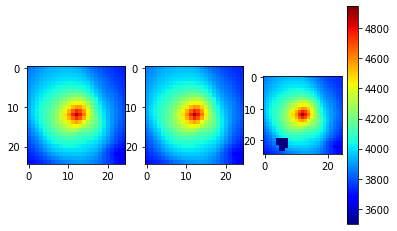

In [ ]:
for i in range(5,12):
  print('data point at i',i)
  start_index = i*one_unit_data_chunk
  end_index = (i+1)*one_unit_data_chunk
  display_normalized_data_subplots(start_index, end_index,30,target1_tr_raw,min_target_raw+3500,max_target_raw)

data point at i 0


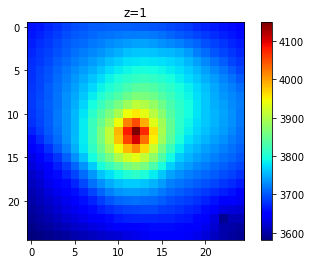

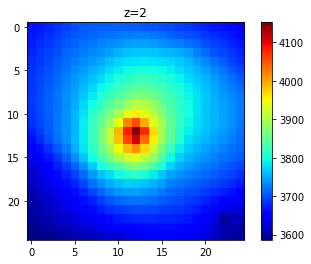

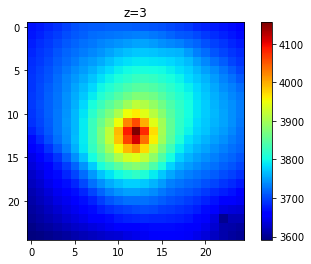

data point at i 1


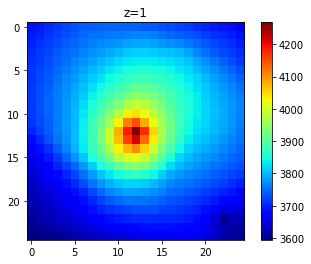

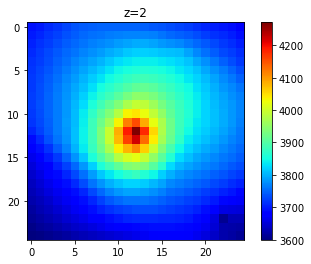

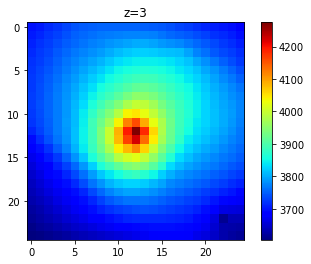

data point at i 2


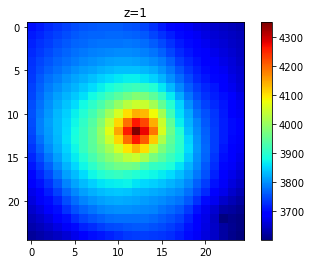

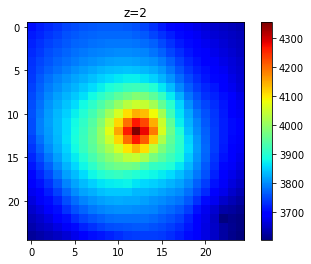

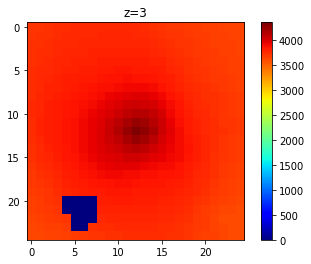

In [ ]:
for i in range(3):
  print('data point at i',i)
  start_index = i*one_unit_data_chunk
  end_index = (i+1)*one_unit_data_chunk
  display_normalized_data(start_index, end_index,30,target1_te_raw)

In [ ]:
len_test = len(target1_te_raw)
len_test_except_3 = (len_test//3)
x = np.linspace(start=0,stop=len_test_except_3,num=len_test_except_3)

In [ ]:
error_base_line_1_part = [0]
error_base_line_2_part = [0]
error_base_line_3_part = [0]
for i in range(3,len_test,3):
  error_base_line_1_part+=[target1_te_raw[i]-target1_te_raw[i-3]]
  error_base_line_2_part+=[target1_te_raw[i+1]-target1_te_raw[i-2]]
  error_base_line_3_part+=[target1_te_raw[i+2]-target1_te_raw[i-1]]

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


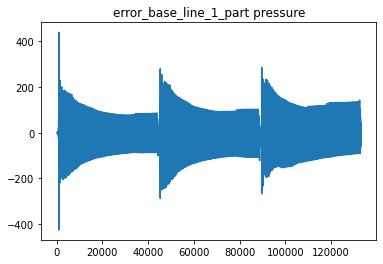

In [ ]:
#baseline error for Testing data1
plt.plot(x,error_base_line_1_part)
plt.title("error_base_line_1_part pressure")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


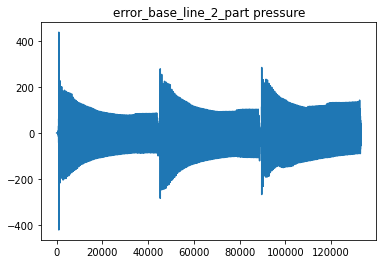

In [ ]:
#baseline error for testdata2
plt.plot(x,error_base_line_2_part)
plt.title("error_base_line_2_part pressure")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


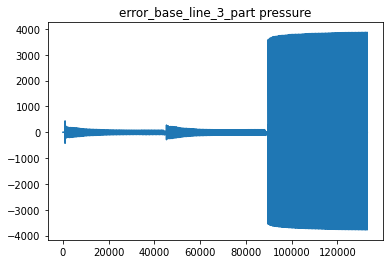

In [ ]:
#baseline error for testdata3
plt.plot(x,error_base_line_3_part)
plt.title("error_base_line_3_part pressure")
plt.show()

In [ ]:
json_file = open('model_myrescale_500_shuf_STT_pressure.json', 'r')

FileNotFoundError: ignored

In [ ]:

from keras.models import model_from_json

loaded_model_json = json_file.read()


In [ ]:
loaded_model = model_from_json(loaded_model_json)

In [ ]:
loaded_model.load_weights("weights_myrescale_500_shuf_STT_pressure.h5")

In [ ]:
target_got = loaded_model.predict([features1_te])

12481/12481 [==============================] - 18s 1ms/step


data point at i 0


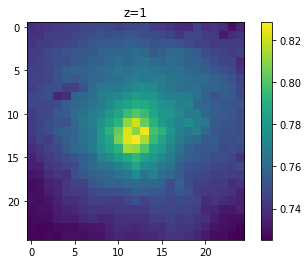

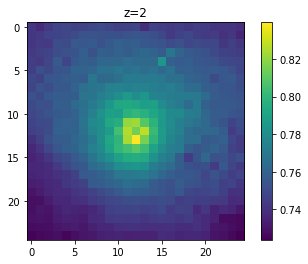

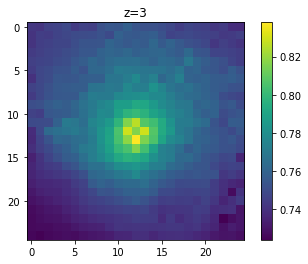

data point at i 1


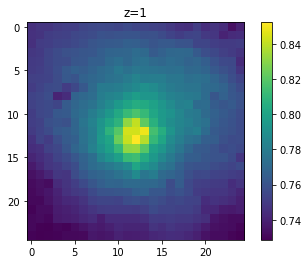

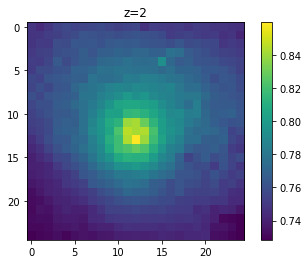

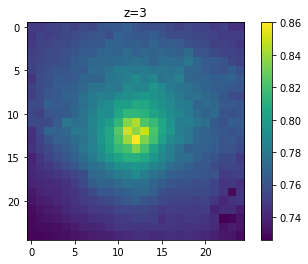

data point at i 2


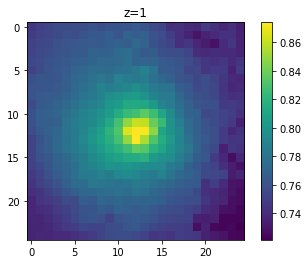

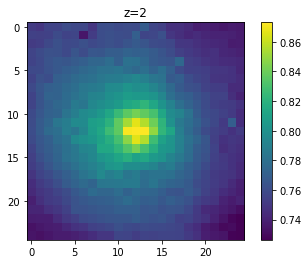

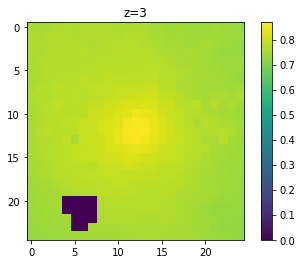

In [ ]:
for i in range(3):
  print('data point at i',i)
  start_index = i*one_unit_data_chunk
  end_index = (i+1)*one_unit_data_chunk
  display_normalized_data(start_index, end_index,30,target_got)

In [ ]:
target_got_rescaled = [0]*len(target_got)
for i in range(len(target_got)):
  target_got_rescaled[i] = (target_got[i]*(max_target-min_target))+min_target

data point at i 0


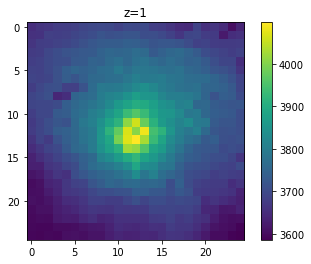

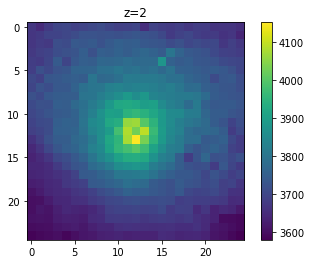

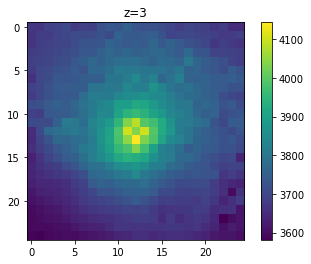

data point at i 1


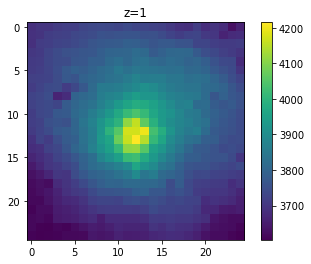

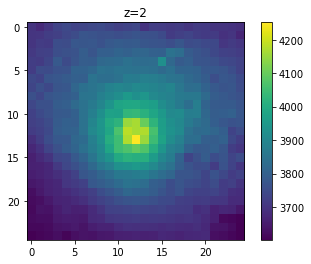

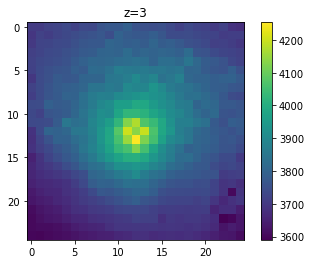

data point at i 2


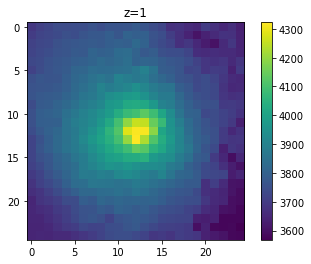

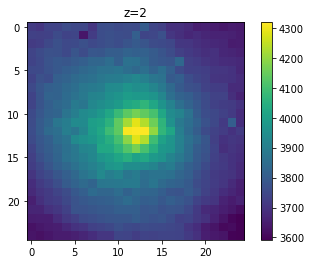

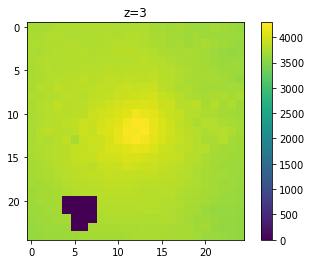

In [ ]:
for i in range(3):
  print('data point at i',i)
  start_index = i*one_unit_data_chunk
  end_index = (i+1)*one_unit_data_chunk
  display_normalized_data(start_index, end_index,30,target_got_rescaled)

In [ ]:
error_target_1_part = [0]
error_target_2_part = [0]
error_target_3_part = [0]
for i in range(0,len_test-3,3):
  error_target_1_part+=[target1_te_raw[i]-target_got_rescaled[i]]
  error_target_2_part+=[target1_te_raw[i+1]-target_got_rescaled[i+1]]
  error_target_3_part+=[target1_te_raw[i+2]-target_got_rescaled[i+2]]

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


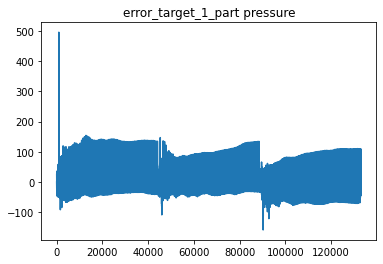

In [ ]:
plt.plot(x,error_target_1_part)
plt.title("error_target_1_part pressure")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


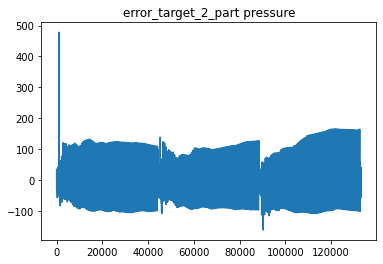

In [ ]:
plt.plot(x,error_target_2_part)
plt.title("error_target_2_part pressure")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


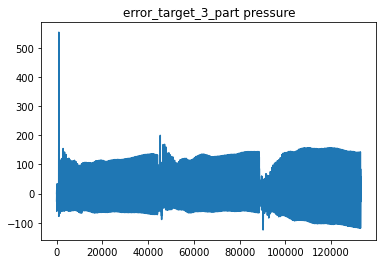

In [ ]:
plt.plot(x,error_target_3_part)
plt.title("error_target_3_part pressure")
plt.show()

In [ ]:

#MSE = (sum(error_target_1_part)+sum(error_target_2_part)+sum(error_target_3_part))/(len(error_target_1_part)+len(error_target_2_part)+len(error_target_3_part))

In [ ]:
print(MSE)

[1.07513252]


In [ ]:
sq_error_target_1_part = np.square(error_target_1_part)
sq_error_target_2_part = np.square(error_target_2_part)
sq_error_target_3_part = np.square(error_target_3_part)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify

In [ ]:
MSE = (sum(sq_error_target_1_part)+sum(sq_error_target_2_part)+sum(sq_error_target_3_part))/(len(error_target_1_part)+len(error_target_2_part)+len(error_target_3_part))

In [ ]:
print(MSE)

[317.99366455]


In [ ]:
print(sq_error_target_1_part)

[0 array([14.9163722]) array([49.94728657]) ... array([1803.57189703])
 array([380.19551633]) array([255.50549835])]


In [ ]:
print(all_permeabilities.shape)

(27, 71, 25, 25, 3)


In [ ]:

def display_permeability_data(realization, timestamp, input):
  plot_x_target = [[0 for i in range(25)] for j in range(25)]
  plot_y_target = [[0 for i in range(25)] for j in range(25)]
  plot_z_target = [[0 for i in range(25)] for j in range(25)]

  for i in range(25):
      for j in range(25):
        for k in range(3):
          plot_x_target[i][j] = np.log(input[realization][timestamp][i][j][0])
          plot_y_target[i][j] = np.log(input[realization][timestamp][i][j][1])
          plot_z_target[i][j] = np.log(input[realization][timestamp][i][j][2])

  plt.imshow(np.squeeze(plot_x_target), cmap="jet")
  plt.title("z=1")
  plt.colorbar()
  plt.show()

  plt.imshow(np.squeeze(plot_y_target), cmap="jet")
  plt.title("z=2")
  plt.colorbar()
  plt.show()

  plt.imshow(np.squeeze(plot_z_target), cmap="jet")
  plt.title("z=3")
  plt.colorbar()
  plt.show()

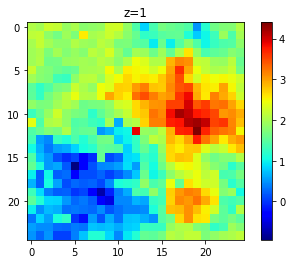

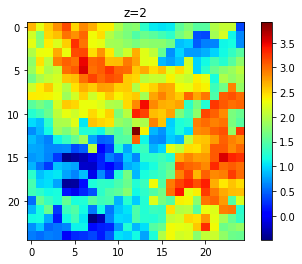

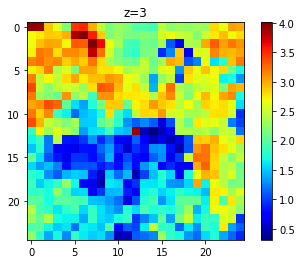

In [ ]:
realization = 1
timestamp = 60

display_permeability_data(realization,timestamp,all_permeabilities)

In [ ]:

def display_porosity_data(realization, timestamp, input):
  plot_x_target = [[0 for i in range(25)] for j in range(25)]
  plot_y_target = [[0 for i in range(25)] for j in range(25)]
  plot_z_target = [[0 for i in range(25)] for j in range(25)]

  for i in range(25):
      for j in range(25):
        for k in range(3):
          plot_x_target[i][j] = input[realization][timestamp][i][j][0]
          plot_y_target[i][j] = input[realization][timestamp][i][j][1]
          plot_z_target[i][j] = input[realization][timestamp][i][j][2]

  plt.imshow(np.squeeze(plot_x_target), cmap="jet")
  plt.title("z=1")
  plt.colorbar()
  plt.show()

  plt.imshow(np.squeeze(plot_y_target), cmap="jet")
  plt.title("z=2")
  plt.colorbar()
  plt.show()

  plt.imshow(np.squeeze(plot_z_target), cmap="jet")
  plt.title("z=3")
  plt.colorbar()
  plt.show()

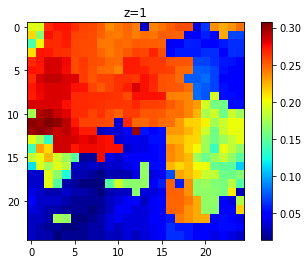

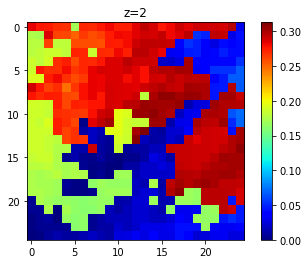

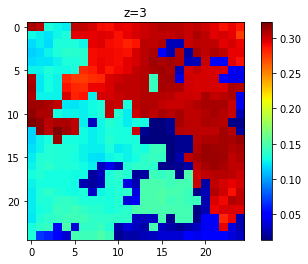

In [ ]:
realization = 1
timestamp = 1

display_porosity_data(realization,timestamp,all_porosities)